# Modules

In [3]:
import pickle
import numpy as np
import pandas as pd
from vmdpy import VMD
import antropy as ant
from sklearn import svm
from sklearn import metrics
from scipy.signal import welch
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Data Preprocessing

In [4]:
a12 = pd.read_csv("./Dataset/as/ones/a12.csv").iloc[:4864, 1:9].dropna().to_numpy()
a13 = pd.read_csv("./Dataset/as/ones/a13.csv").iloc[:4864, 1:9].dropna().to_numpy()
a11 = pd.read_csv("./Dataset/as/ones/Letter_A.csv").iloc[:4864, 1:9].dropna().to_numpy()
a21 = pd.read_csv("./Dataset/as/twos/a21.csv").iloc[:4864, 1:9].dropna().to_numpy()
a4 = pd.read_csv("./Dataset/as/fours/a4.csv").iloc[:4864, 1:9].dropna().to_numpy()

as_1 = pd.read_csv("./Dataset/dataset/as_1.csv").dropna().iloc[:2304, 1:9].to_numpy()

ak_1 = pd.read_csv("./Dataset/A11_K.csv").dropna().iloc[0:12032, 1:9].to_numpy()
ak_2 = pd.read_csv("./Dataset/A12_K.csv").dropna().iloc[0:12032, 1:9].to_numpy()

In [5]:
b12 = pd.read_csv("./Dataset/bs/ones/b12.csv").dropna().iloc[:4864, 1:9].to_numpy()
b13 = pd.read_csv("./Dataset/bs/ones/b13.csv").dropna().iloc[:4864, 1:9].to_numpy()
b11 = pd.read_csv("./Dataset/bs/ones/Letter_B.csv").dropna().iloc[:4864, 1:9].to_numpy()
b31 = pd.read_csv("./Dataset/bs/threes/b31.csv").dropna().iloc[:4864, 1:9].to_numpy()
b4 = pd.read_csv("./Dataset/bs/fours/b4.csv").dropna().iloc[:4864, 1:9].to_numpy()

bs_1 = pd.read_csv("./Dataset/dataset/bs_1.csv").dropna().iloc[:2304, 1:9].to_numpy()

bk_1 = pd.read_csv("./Dataset/B11_K.csv").dropna().iloc[:12032, 1:9].to_numpy()
bk_2 = pd.read_csv("./Dataset/B12_K.csv").dropna().iloc[:12032, 1:9].to_numpy()



In [6]:
base1s = pd.read_csv("./Dataset/baselines/Baseline_EEG.csv").dropna().iloc[:, 1:9]
base2s = pd.read_csv("./Dataset/baselines/rest2.csv").dropna().iloc[:, 1:9]
base3s = pd.read_csv("./Dataset/baselines/rest3.csv").dropna().iloc[:, 1:9]
base4s = pd.read_csv("./Dataset/baselines/base4.csv").dropna().iloc[:, 1:9]


base1s_1 = pd.read_csv("./Dataset/dataset/rest_s1.csv").dropna().iloc[:, 1:9]

base1k_1 = pd.read_csv("./Dataset/rest_eeg_K.csv").dropna().iloc[:, 1:9]

In [7]:
mean_1 = base1s.describe().iloc[1].to_numpy().reshape((1, 8))
std_1 = base1s.describe().iloc[2].to_numpy().reshape((1, 8))

mean_2 = base2s.describe().iloc[1].to_numpy().reshape((1, 8))
std_2 = base2s.describe().iloc[2].to_numpy().reshape((1, 8))

mean_3 = base3s.describe().iloc[1].to_numpy().reshape((1, 8))
std_3 = base3s.describe().iloc[2].to_numpy().reshape((1, 8))

mean_4 = base4s.describe().iloc[1].to_numpy().reshape((1, 8))
std_4 = base4s.describe().iloc[2].to_numpy().reshape((1, 8))

mean1_s = base1s_1.describe().iloc[1].to_numpy().reshape((1, 8))
std1_s = base1s_1.describe().iloc[2].to_numpy().reshape((1, 8))

mean1_k = base1k_1.describe().iloc[1].to_numpy().reshape((1, 8))
std1_k = base1k_1.describe().iloc[2].to_numpy().reshape((1, 8))

## BaseLine Correction

In [8]:
a12_new = np.zeros((19, 256, 8))
a13_new = np.zeros((19, 256, 8))
a11_new = np.zeros((19, 256, 8))
a21_new = np.zeros((19, 256, 8))
a4_new = np.zeros((19, 256, 8))
as_new = np.zeros((9, 256, 8))
ak1_new = np.zeros((46, 256, 8))
ak2_new = np.zeros((46, 256, 8))

b12_new = np.zeros((19, 256, 8))
b13_new = np.zeros((19, 256, 8))
b11_new = np.zeros((19, 256, 8))
b31_new = np.zeros((19, 256, 8))
b4_new = np.zeros((19, 256, 8))
bs_new = np.zeros((9, 256, 8))
bk1_new = np.zeros((46, 256, 8))
bk2_new = np.zeros((46, 256, 8))

for i in range(19):
    for j in range(256):
        for k in range(8):
            a12_new[i, j, k] = (a12[i+j, k] - mean_1[0, k])/std_1[0, k]
            a13_new[i, j, k] = (a13[i+j, k] - mean_1[0, k])/std_1[0, k]
            a11_new[i, j, k] = (a11[i+j, k] - mean_1[0, k])/std_1[0, k]
            a21_new[i, j, k] = (a21[i+j, k] - mean_2[0, k])/std_2[0, k]
            a4_new[i, j, k] = (a4[i+j, k] - mean_4[0, k])/std_4[0, k]



            b12_new[i, j, k] = (b12[i+j, k] - mean_1[0, k])/std_1[0, k]
            b13_new[i, j, k] = (b13[i+j, k] - mean_1[0, k])/std_1[0, k]
            b11_new[i, j, k] = (b11[i+j, k] - mean_1[0, k])/std_1[0, k]
            b31_new[i, j, k] = (b31[i+j, k] - mean_3[0, k])/std_3[0, k]
            b4_new[i, j, k] = (b4[i+j, k] - mean_4[0, k])/std_4[0, k]

for i in range(9):
    for j in range(256):
        for k in range(8):
            as_new[i, j, k] = (as_1[i+j, k] - mean1_s[0, k])/std1_s[0, k]
            bs_new[i, j, k] = (bs_1[i+j, k] - mean1_s[0, k])/std1_s[0, k]


for i in range(46):
    for j in range(256):
        for k in range(8):
            ak1_new[i, j, k] = (ak_1[i+j, k] - mean1_k[0, k])/std1_k[0, k]
            ak2_new[i, j, k] = (ak_2[i+j, k] - mean1_k[0, k])/std1_k[0, k]

            bk1_new[i, j, k] = (bk_1[i+j, k] - mean1_k[0, k])/std1_k[0, k]
            bk2_new[i, j, k] = (bk_2[i+j, k] - mean1_k[0, k])/std1_k[0, k]

In [9]:
all_a_s = np.concatenate((a12_new, a13_new, a11_new, a21_new, a4_new, as_new, ak1_new, ak2_new), axis = 0)
all_b_s = np.concatenate((b12_new, b13_new, b11_new, b31_new, b4_new, bs_new, bk1_new, bk2_new), axis = 0)

all_a_s = all_a_s.reshape((196, 256, 8))
all_b_s = all_b_s.reshape((196, 256, 8))

## VMD

In [10]:
def vmd_signals(input_mats):
    out_vmd = []
    fs = 256
    alpha = 500      # moderate bandwidth constraint  
    tau = 0           # noise-tolerance (no strict fidelity enforcement)  
    K = 7              # 7 modes  
    DC = 0             # no DC part imposed  
    init = 1           # initialize omegas uniformly  
    tol = 1e-7
    for i in range(input_mats.shape[0]):
        channel_list = []
        for j in range(8): # 8 channels
            u, _, _ = VMD(input_mats[i, :, j], alpha, tau, K, DC, init, tol)
            channel_list.append(u[:, 1]) # u[: ,1] because the required frequency was in that mode consistently
        out_vmd.append(channel_list)
    return out_vmd


# Feature Extraction

### Katz

In [11]:
def katz_centrality(input_mats, alpha=0.1, beta=1.0):
    out_mats = []
    for A in input_mats:
        A = np.corrcoef(A.T)
        n = A.shape[0]
        I = np.eye(n)
        ones = np.ones(n)
    
    # Ensure alpha is less than 1/lambda_max
        eigenvalues = np.linalg.eigvals(A)
        lambda_max = max(np.abs(eigenvalues))
        assert alpha < 1/lambda_max, "alpha must be less than 1/lambda_max"
    
    # Compute Katz centrality
        K = np.linalg.inv(I - alpha * A) @ (beta * ones)
        out_mats.append(K)
    return np.array(out_mats)


### Power Spectral Density

In [12]:
def psd(data_list):
    out = []
    for data in data_list:
        # Compute the PSD for each channel
        psd_values = []

        for i in range(7):
            _, Pxx = welch(data[i, :], 8, nperseg=8)
            psd_values.append(Pxx)
        out.append(np.array(psd_values).flatten())
    return np.array(out)

### Spectral Entropy

In [13]:
def spectral_entro(input_mat):
    out = []
    for x in input_mat: 
        out.append(ant.spectral_entropy(x, 7, method='fft'))
    return np.array(out)

In [14]:
vmd_a_s = vmd_signals(all_a_s)
vmd_b_s = vmd_signals(all_b_s)

In [15]:
katz_a_s = katz_centrality(np.array(vmd_a_s))
katz_b_s = katz_centrality(np.array(vmd_b_s))

psd_a_s = psd(np.array(vmd_a_s))
psd_b_s = psd(np.array(vmd_b_s))

spen_a_s = spectral_entro(np.array(vmd_a_s))
spen_b_s = spectral_entro(np.array(vmd_b_s))

c:\Users\Shreyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:589: UserWarning: nperseg = 8 is greater than input length  = 7, using nperseg = 7
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


# Combining Features

In [16]:
def combine(katz_a_s, psd_a_s, spen_a_s):
    combined_features_all = []

    for i in range(196):
        f1 = katz_a_s[i]
        f2 = psd_a_s[i]
        f3 = spen_a_s[i]
        
        combined_features = np.concatenate((f1, f2, f3))
        combined_features_all.append(combined_features)
    return combined_features_all

In [17]:
A_vals = combine(katz_a_s, psd_a_s, spen_a_s)
B_vals = combine(katz_b_s, psd_b_s, spen_b_s)

# Train and Test Split

In [18]:
X = np.array([A_vals, B_vals]).reshape((392, 43))
num_of_output = 2
y = np.array([[0]*196, [1]*196]).reshape((392,))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=24)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(313, 43)
(313,)
(79, 43)
(79,)


In [20]:
with open("X_train_ML", 'wb') as fp:
    pickle.dump(X_train, fp)

with open("X_test_ML", 'wb') as fp:
    pickle.dump(X_test, fp)

with open("y_train_ML", 'wb') as fp:
    pickle.dump(y_train, fp)

with open("y_test_ML", 'wb') as fp:
    pickle.dump(y_test, fp)

# Model Training

### SVM

In [21]:
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)
model_pkl_file = "SVM_MODEL.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model_svm, file)

In [24]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        41
           1       1.00      0.79      0.88        38

    accuracy                           0.90        79
   macro avg       0.92      0.89      0.90        79
weighted avg       0.92      0.90      0.90        79



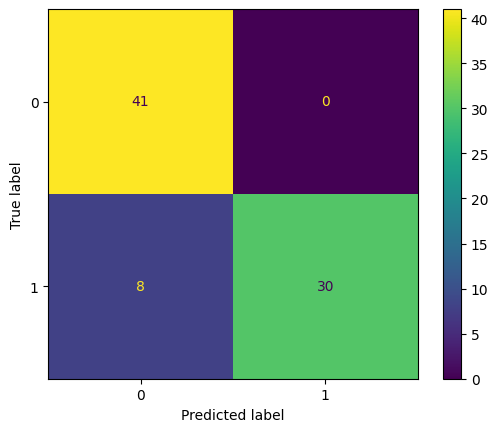

In [25]:
# Make predictions on the test set
y_pred = model_svm.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred)) 
conf_mat = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [0, 1])
cm_display.plot()
plt.show()

### Random Forest

In [26]:
model_forest = RandomForestClassifier(max_depth=2, random_state=0)
model_forest.fit(X_train, y_train)
model_pkl_file = "RANDOM_FOREST_MODEL.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model_svm, file)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       1.00      0.97      0.99        38

    accuracy                           0.99        79
   macro avg       0.99      0.99      0.99        79
weighted avg       0.99      0.99      0.99        79



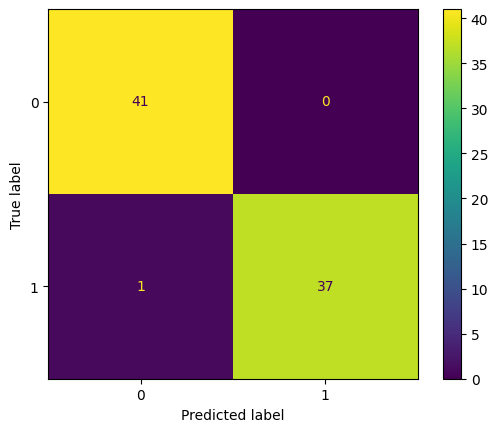

In [27]:
# Make predictions on the test set
y_pred = model_forest.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred)) 

conf_mat = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [0, 1])
cm_display.plot()
plt.show()